In [94]:
#Data Processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

##Coverting the file into CSV file from txt file
# read_file = pd.read_csv (r'E:\Foundation of Data Science\po1_data.txt')
# read_file.to_csv (r'E:\Foundation of Data Science\po1_csvdata.csv', index=None)

# Defining column names
df = pd.read_csv("E:\Foundation of Data Science\po1_csvdata.csv")
column_names = [
    'Subject_Identifier', 'Jitter_Percent', 'Jitter_Absolute', 'Jitter_RAP', 'Jitter_PPQ5',
    'Jitter_DDP', 'Shimmer_Percent', 'Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5',
    'Shimmer_APQ11', 'Shimmer_DDA', 'Harmonicity_NHR_HNR_Autocorr', 'Harmonicity_NHR',
    'Harmonicity_HNR', 'Pitch_Median', 'Pitch_Mean', 'Pitch_StdDev', 'Pitch_Min',
    'Pitch_Max', 'Pulse_NumPulses', 'Pulse_NumPeriods', 'Pulse_MeanPeriod', 'Pulse_StdDevPeriod',
    'Voice_UnvoicedFramesFraction', 'Voice_NumBreaks', 'Voice_DegreeBreaks', 'UPDRS', 'PD_Indicator'
]
df.columns = column_names

# Segregetting the data into PD and Non-PD group
PD_0 = df[df.iloc[:, 28] == 0]
PD_1 = df[df.iloc[:, 28] == 1]

check = group_0.iloc[:, 10]
check2 = group_1.iloc[:, 10]

UPDR = df.iloc[:, 27]
Label = df.iloc[:, 28]







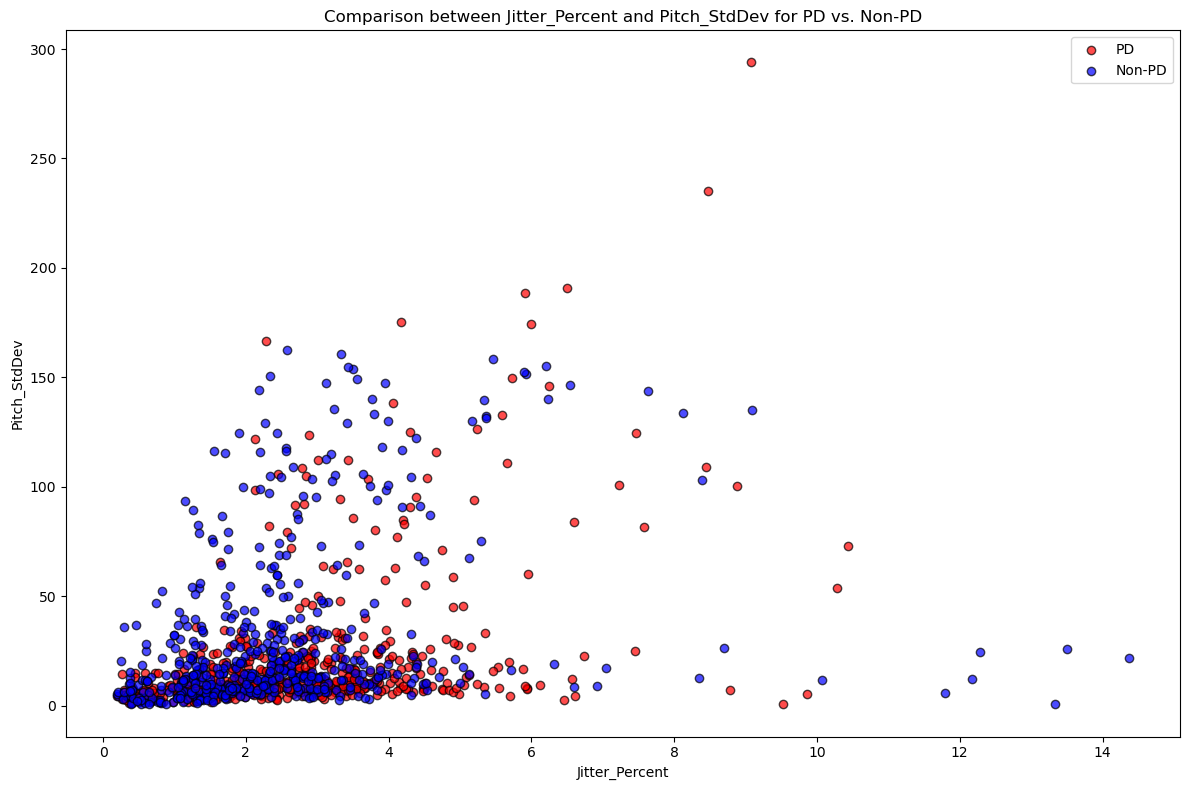

In [96]:
##Exploratory Data Analysis
# Two features for comparison
feature1 = 'Jitter_Percent' # Replace with your first feature name
feature2 = 'Pitch_StdDev'# Replace with your second feature name

# Create scatter plot
plt.figure(figsize=(12, 8))

# Plotting for the PD group
plt.scatter(PD_1[feature1], PD_1[feature2], color='red', label='PD', alpha=0.7, edgecolors='black')

# Plotting for the non-PD group
plt.scatter(PD_0[feature1], PD_0[feature2], color='blue', label='Non-PD', alpha=0.7, edgecolors='black')

# Set labels, title, and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Comparison between {feature1} and {feature2} for PD vs. Non-PD')
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

PD Group:

Subject_Identifier - Mean: 10.518, Std Dev: 5.762
Jitter_Percent - Mean: 2.854, Std Dev: 1.681
Jitter_Absolute - Mean: 0.000, Std Dev: 0.000
Jitter_RAP - Mean: 1.357, Std Dev: 0.918
Jitter_PPQ5 - Mean: 1.476, Std Dev: 1.020
Jitter_DDP - Mean: 4.070, Std Dev: 2.755
Shimmer_Percent - Mean: 12.977, Std Dev: 4.711
Shimmer_dB - Mean: 1.207, Std Dev: 0.365
Shimmer_APQ3 - Mean: 5.647, Std Dev: 2.487
Shimmer_APQ5 - Mean: 7.881, Std Dev: 3.514
Shimmer_APQ11 - Mean: 13.107, Std Dev: 6.328
Shimmer_DDA - Mean: 16.941, Std Dev: 7.460
Harmonicity_NHR_HNR_Autocorr - Mean: 0.853, Std Dev: 0.074
Harmonicity_NHR - Mean: 0.220, Std Dev: 0.131
Harmonicity_HNR - Mean: 10.171, Std Dev: 3.898
Pitch_Median - Mean: 158.637, Std Dev: 46.886
Pitch_Mean - Mean: 162.947, Std Dev: 48.808
Pitch_StdDev - Mean: 23.134, Std Dev: 34.352
Pitch_Min - Mean: 131.738, Std Dev: 42.932
Pitch_Max - Mean: 218.000, Std Dev: 109.482
Pulse_NumPulses - Mean: 115.813, Std Dev: 178.694
Pulse_NumPeriods - Mean: 112.915, Std 

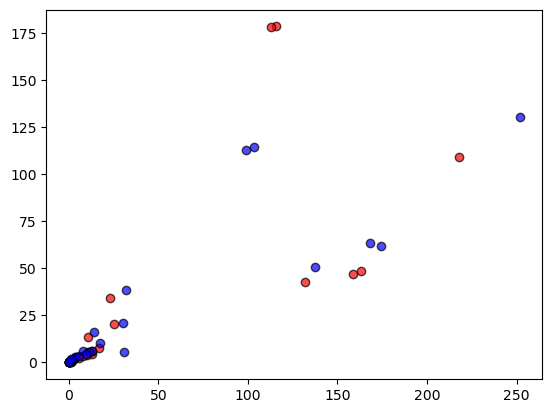

In [87]:
##Mean & Standard deviation of the features

# Drop the non-feature columns
features = df.drop(columns=['UPDRS', 'PD_Indicator'])

# mean and standard deviation for the PD group
mean_PD = PD_1[features.columns].mean()
std_dev_PD = PD_1[features.columns].std()

# mean and standard deviation for the non-PD group
mean_non_PD = PD_0[features.columns].mean()
std_dev_non_PD = PD_0[features.columns].std()

# Plotting for the PD group
plt.scatter(mean_PD, std_dev_PD, color='red', label='PD', alpha=0.7, edgecolors='black')

# Plotting for the non-PD group
plt.scatter(mean_non_PD, std_dev_non_PD, color='blue', label='Non-PD', alpha=0.7, edgecolors='black')

# the results of mean and standard deviation
print("PD Group:\n")
for feature in features.columns:
    print(f"{feature} - Mean: {mean_PD[feature]:.3f}, Std Dev: {std_dev_PD[feature]:.3f}")

print("\nNon-PD Group:\n")
for feature in features.columns:
    print(f"{feature} - Mean: {mean_non_PD[feature]:.3f}, Std Dev: {std_dev_non_PD[feature]:.3f}")


In [91]:
# t-test to choose salient features
from scipy.stats import ttest_ind

# List of feature column names (excluding 'UPDRS' and 'PD_Indicator')
feature_columns = df.columns.drop(['UPDRS', 'PD_Indicator'])

# Store results
t_stats = []
p_values = []

for feature in feature_columns:
    t_stat, p_val = ttest_ind(PD_1[feature], PD_0[feature])
    t_stats.append(t_stat)
    p_values.append(p_val)

# Combine results into a DataFrame for better visualization
results = pd.DataFrame({
    'Feature': feature_columns,
    'T-Statistic': t_stats,
    'P-Value': p_values
})

# Filter features with significant p-values (assuming alpha = 0.05)
significant_features = results[results['P-Value'] < 0.05]

print(significant_features[1:])

                         Feature  T-Statistic       P-Value
1                 Jitter_Percent     3.179958  1.516631e-03
2                Jitter_Absolute     5.483007  5.251706e-08
3                     Jitter_RAP     3.614592  3.152732e-04
4                    Jitter_PPQ5     3.612106  3.182736e-04
5                     Jitter_DDP     3.614414  3.154874e-04
10                 Shimmer_APQ11     4.796425  1.851521e-06
12  Harmonicity_NHR_HNR_Autocorr     2.600069  9.453026e-03
13               Harmonicity_NHR    -2.435603  1.503461e-02
15                  Pitch_Median    -2.724924  6.539847e-03
16                    Pitch_Mean    -3.342850  8.588590e-04
17                  Pitch_StdDev    -3.915311  9.618599e-05
19                     Pitch_Max    -4.523361  6.788944e-06
22              Pulse_MeanPeriod     2.651224  8.142329e-03
24  Voice_UnvoicedFramesFraction    -3.923123  9.316307e-05
25               Voice_NumBreaks    -2.558841  1.064320e-02
26            Voice_DegreeBreaks    -4.0